# Part 2: Boundary Value Problem: Euler-Bernoulli Bending Beam

![bending beam](https://files.mude.citg.tudelft.nl/bending_beam.png)

> Adapted from https://commons.wikimedia.org/wiki/File:Euler-Bernoulli_beam_theory-2.svg. https://commons.wikimedia.org/wiki/File:Euler-Bernoulli_beam_theory-2.svg (CC BY 3.0).

The bending deflection of a beam, subject to a distributed load $q$, and the corresponding bending moment distribution, is a boundary value problem that can be described by two second-order differential equations according to Euler-Bernoulli:

Bending moments $M$:

$$ \frac{d^2 M}{dx^2} = -q $$

Beam deflection $w$:

$$ M = - EI \frac{d^2 w}{dx^2} $$

where
*   $M$ = bending moment
*   $w$ = beam deflection
*   $q$ = distributed load
*   $EI$ = flexural rigidity (bending stiffness)
*   $x$ = longitudinal direction

The boundary conditions for this problem depend on how the beam is supported at the left and right ends. In this case, we consider a simply supported beam where the displacement and the bending moment are zero at both ends of the beam:

*   $M_{x=0}$ = 0
*   $w_{x=0}$ = 0
*   $M_{x=L}$ = 0
*   $w_{x=L}$ = 0         (these are all Dirichlet boundary conditions)

![simply supported beam](https://files.mude.citg.tudelft.nl/simply_supported.png)


## Numerical solution

First, we will implement a numerical solution solving the two differential equations sequentially (one after the other), by using a central difference scheme for both equations.

### Central Difference scheme for both equations

The Central Difference scheme can be formulated in terms of bending moments $M_i$ and beam deflection $w_i$ where $i$ refers to the position in the numerical grid.

$$ \frac{M_{i-1} - 2 M_i + M{i+1}}{\Delta x^2} = -q_i \quad \text{or} \quad M_{i-1} - 2 M_i + M_{i+1} = - \Delta x^2 q_i $$

$$ - \frac{M_i}{EI} = \frac{w_{i-1} - 2 w_i + w_{i+1}}{\Delta x^2} \quad \text{or} \quad  w_{i-1} - 2 w_i + w_{i+1} = -\frac{\Delta x^2}{EI} M_i \quad \text{or} \quad \frac{\Delta x^2}{EI} M_i + w_{i-1} - 2 w_i + w_{i+1} = 0 $$

Starting from $i=1$ we get:
$$ \quad M_0 - 2 M_1 + M_2 = - \Delta x^2 q_1 $$
$$ \quad M_1 - 2 M_2 + M_3 = - \Delta x^2 q_2 $$
$$ \text{etc.}$$
and 
$$ \quad w_0 - 2 w_1 + w_2 = -\frac{\Delta x^2}{EI} M_1 $$
$$ \quad w_1 - 2 w_2 + w_3 = -\frac{\Delta x^2}{EI} M_2 $$
$$ \text{etc.}$$

By considering all $i$-values in the grid, ranging from $1$ to $n-1$ (excluding the boundaries), we end up with two systems of $n-1$ equations with $n-1$ unknowns.
Without the boundary conditions, these systems are singular (that is, we cannot solve them). We need to add the boundary conditions to make it solvable.
This can simply be done by adding the following equations to the top and bottom of the system, ending up with two systems of $n+1$ equations with $n+1$ unknowns:

$$ \quad M_0 = M_{x=0}$$
$$ \quad M_n = M_{x=L}$$
$$ \quad w_0 = w_{x=0}$$
$$ \quad w_n = w_{x=L}$$

Since the bending moments $M$ can be solved independently from the beam deflection $w$, we can solve the first system first, and use the solution (i.c. $M$) to solve the second system, which depends on $M$.

We can write a system of equations as a matrix-vector system $A u = b$ by collecting all unknowns (here $M$ and $w$) in vector $u$ and putting the right-hand terms in vector $b$.



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$
    
Formulate the above equations from the central difference scheme as two separate matrix-vector systems. Include the grid boundaries and boundary conditions in the system.

The bending moments $M$ should show up in the vector $u$ in one of the systems, but in the vector $b$ in the other system. Why is that the case?

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.1:}$


$$
\left[
\begin{matrix}
1 & 0 & 0 & 0 & {} & {} & {} & {} \\
1 & -2 & 1 & 0 & {} & {} & {} & {} \\
0 & 1 & -2 & 1 & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & 1 & -2 & 1 & 0 \\
{} & {} & {} & {} & 0 & 1 & -2 & 1 \\
{} & {} & {} & {} & 0 & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
M_0 \\
M_1 \\
M_2 \\
\vdots \\
M_{n-2} \\
M_{n-1} \\
M_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
M_{x=0} \\
- \Delta x^2 q \\
- \Delta x^2 q \\
\vdots \\
- \Delta x^2 q \\
- \Delta x^2 q \\
M_{x=L} \\
\end{matrix}
\right]
$$

and

$$
\left[
\begin{matrix}
1 & 0 & 0 & 0 & {} & {} & {} & {} \\
1 & -2 & 1 & 0 & {} & {} & {} & {} \\
0 & 1 & -2 & 1 & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & 1 & -2 & 1 & 0 \\
{} & {} & {} & {} & 0 & 1 & -2 & 1 \\
{} & {} & {} & {} & 0 & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
w_0 \\
w_1 \\
w_2 \\
\vdots \\
w_{n-2} \\
w_{n-1} \\
w_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
w_{x=0} \\
-\cfrac{\Delta x^2}{EI} M_1\\
-\cfrac{\Delta x^2}{EI} M_2 \\
\vdots \\
-\cfrac{\Delta x^2}{EI} M_{n-2} \\
-\cfrac{\Delta x^2}{EI} M_{n-1} \\
w_{x=L} \\
\end{matrix}
\right]
$$

where $n$ is the number of grid points. Since the bending moments $M$ can be solved independently from the beam deflection $w$, we can solve the first matrix-vector system first, and use the solution (i.c. $M$) to solve the second matrix-vector system, which depends on $M$.

Thus, the bending moments $M$ are the unknowns in the first system of equations, and as such are included in the vector $u$. In the second system, $M$ is considered known and therefore needs to be moved to the right-hand-side. So the bending moments will be included in the vector $b$ in this system.

</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Beam properties
EI = 1e6
L = 10.0
q = -10.0

# Boundary conditions (Dirichlet)
w0 = 0.0
wL = 0.0
M0 = 0.0
ML = 0.0

# Discretisation
dx = 1.0
n_x = round(L / dx)

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$
    
Complete the code below to first solve for the bending moments $M$, followed by the beam deflection $w$.
You are also asked to visualise the structure of the matrix (see last week's programming assignment).

</p>
</div>

## Solving bending moments M:

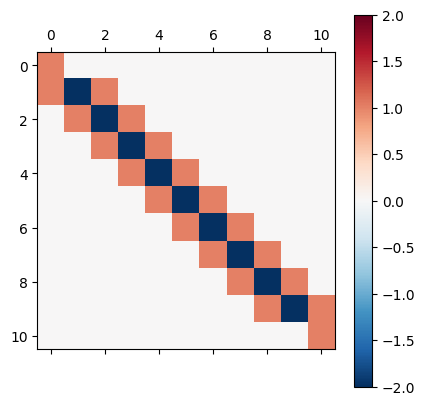

In [2]:
# Initialisation of (sub-)matrix and vector
A11 = np.zeros([n_x + 1, n_x + 1])
b1  = np.zeros(n_x + 1)
x = [i * dx for i in range(n_x + 1)]

# filling the matrix (A11) and vector (b1) components for the first system
A11[range(1, n_x), range(n_x - 1)] = 1.0
A11[range(1, n_x), range(1, n_x)] = -2.0
A11[range(1, n_x), range(2, n_x + 1)] = 1.0
A11[0, 0] = 1.0
A11[n_x, n_x] = 1.0
b1[range(1, n_x)] = -dx * dx * q
b1[0] = M0
b1[n_x] = ML

# visualise the matrix
plt.matshow(A11, cmap="RdBu_r", vmin=-2., vmax=2.)
plt.colorbar()

# solve the system of equations
M = np.linalg.solve(A11, b1)

## Solving beam deflection w

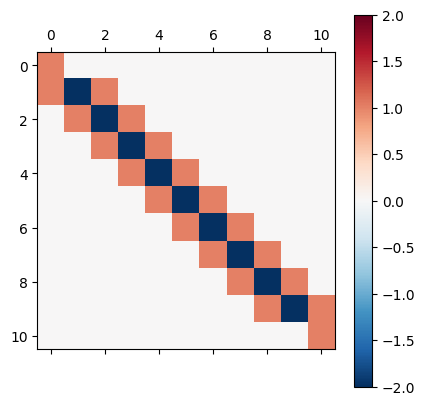

In [3]:
# Initialisation of (sub-)matrix and vector
A22 = np.zeros([n_x + 1, n_x + 1])
b2  = np.zeros(n_x + 1)

# filling the matrix (A22) and vector (b2) components for the second system
A22[range(1, n_x), range(n_x - 1)] = 1.0
A22[range(1, n_x), range(1, n_x)] = -2.0
A22[range(1, n_x), range(2, n_x + 1)] = 1.0
A22[0, 0] = 1.0
A22[n_x, n_x] = 1.0
b2[range(1, n_x)] = -dx * dx * M[range(1, n_x)] / EI     # note that M is based on the solution from the first system
b2[0] = w0
b2[n_x] = wL

# visualise the matrix
plt.matshow(A22, cmap="RdBu_r", vmin=-2., vmax=2.)
plt.colorbar()


# solve the system of equations
w = np.linalg.solve(A22, b2)

## Plotting the results

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.3:}$
    
Run the code cell below to plot the solutions:

</p>
</div>

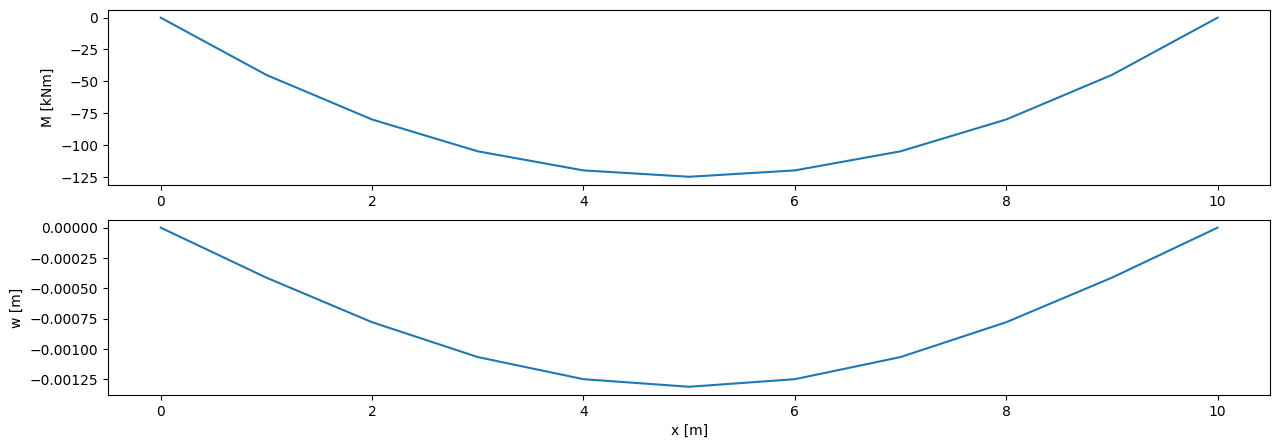

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

ax[0].plot(x, M)
ax[0].set_ylabel("M [kNm]")

ax[1].plot(x, w)
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("w [m]")

plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.4:}$
    
Compare these solutions with the so-called Myosotis rules ('Forget-me-nots' or 'Vergeet-me-nietjes') for the maximum moment and maximum deflection of a simply supported bending beam:
$$ M = \frac{1}{8} q l^2$$
and
$$ w = \frac{5}{384} \frac{q l^4}{EI}$$
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>

$\text{Solution 2.4:}$
    
$$ M = \frac{1}{8} q l^2 = 125 \space kNm$$
and
$$ w = \frac{5}{384} \frac{q l^4}{EI} = 0.0013 \space m$$
</p>
</div>

## Solving both equations simultaneously

Instead of solving the differential equations sequentially, we can also solve them simultaneously by setting up one 'big' (coupled) system of equations involving both bending moments and beam deflection as variables. In that, we can make use of the sub-matrices as calculated before (A11 and A22 in the code). However, the right-hand side vector of the second part (i.c. the term $-\frac{\Delta x^2}{EI} M$) is now moved to the left-hand side and integrated in the lower left-hand block of the matrix as $\frac{\Delta x^2}{EI}$ (sub-matrix A21 in the code), while $M$ is in the vector with unknowns.

$$ \frac{M_{i-1} - 2 M_i + M{i+1}}{\Delta x^2} = -q_i \quad \text{or} \quad M_{i-1} - 2 M_i + M_{i+1} = - \Delta x^2 q_i $$

$$ \quad  w_{i-1} - 2 w_i + w_{i+1} = -\frac{\Delta x^2}{EI} M_i \quad \text{or} \quad \frac{\Delta x^2}{EI} M_i + w_{i-1} - 2 w_i + w_{i+1} = 0 $$



<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.5:}$
    
Formulate the above equations from the central difference scheme (right-hand side of the 'or') as a single matrix-vector system. Include the grid boundaries and boundary conditions in the system.

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

<p>

$\text{Solution 2.5:}$

$$
\left[
\begin{matrix}
1 & 0 & 0 & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
1 & -2 & 1 & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & 1 & -2 & 1 & {} & {} & {} & {} & {} & {} \\
{} & {} & {} & 0 & 0 & 1 & {} & {} & {} & {} & {} & {} \\
0 & {} & {} & {} & {} & {} & 1 & 0 & 0 & {} & {} & {} \\
{} & \cfrac{\Delta x^2}{EI} & {} & {} & {} & {} & 1 & -2 & 1 & {} & {} & {} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
{} & {} & {} & {} & \cfrac{\Delta x^2}{EI} & {} & {} & {} & {} & 1 & -2 & 1 \\
{} & {} & {} & {} & {} & 0 & {} & {} & {} & 0 & 0 & 1 \\
\end{matrix}
\right]
\left[
\begin{matrix}
M_0 \\
M_1 \\
\vdots \\
M_{n-1} \\
M_n \\
w_0 \\
w_1 \\
\vdots \\
w_{n-1} \\
w_n \\
\end{matrix}
\right]
=
\left[
\begin{matrix}
M_{x=0} \\
- \Delta x^2 q \\
\vdots \\
- \Delta x^2 q \\
M_{x=L} \\
w_{x=0} \\
0 \\
\vdots \\
0 \\
w_{x=L} \\
\end{matrix}
\right]
$$

Note that the upper right-hand block remains zero, so the matrix is not symmetric! In fact, the two matrices above are also not fully symmetric.

</p>
</div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.6:}$
    
Complete the code below to create the matrix-vector system.

</p>
</div>

In [5]:
A11 = np.zeros([n_x + 1, n_x + 1])
A12 = np.zeros([n_x + 1, n_x + 1])
A21 = np.zeros([n_x + 1, n_x + 1])
b1 = np.zeros(n_x + 1)
b2 = np.zeros(n_x + 1)

# filling the matrix (A) and vector components (b) for the entire system
# the complete matrix A is supposed to be subdivided in blocks (A11, A12, A21, A22), which will be built together at the end
# similarly, the complete vector b is subdivided in b1 and b2
A11[range(1, n_x), range(n_x - 1)] = 1.0
A11[range(1, n_x), range(1, n_x)] = -2.0
A11[range(1, n_x), range(2, n_x + 1)] = 1.0
A11[0, 0] = 1.0
A11[n_x, n_x] = 1.0
A21[range(1, n_x), range(1, n_x)] = dx * dx / EI     # note that sub-matrix A12 remains zero
A22 = A11
b1[range(1, n_x)] = -dx * dx * q
b1[0]   = M0
b1[n_x] = ML
b2[0]   = w0
b2[n_x] = wL                        # note that the intermediate terms in b2 remain zero

# assembling the full matrix (A) and vector (b) 
A = np.block([[A11, A12], [A21, A22]])
b = np.concatenate([b1, b2])

</p>

We will now visualize the matrix using `matshow`.
The sub-matrix $A21$ in $A$ contains terms that are much smaller than the terms around the diagonal in $A$;
they will not be visible using a standard `matshow` command.
To visualise all non-zero matrix terms, we create an image of the $A$-matrix and set positive terms to $1$ and negative terms to $-1$.


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.7:}$
    
Run the code cell below to visualise the structure of the matrix:

</p>
</div>

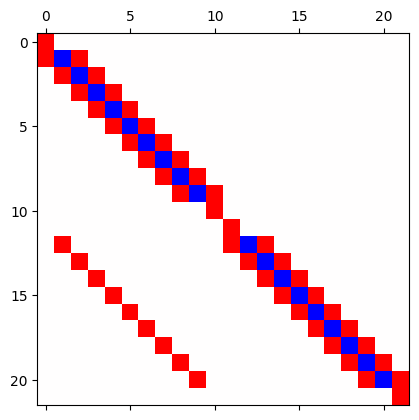

In [6]:
negatives_replaced = np.where(A < 0, -1, A)
A_plot = np.where(A > 0, 1, negatives_replaced)
plt.matshow(A_plot, cmap="bwr")

Solving the system of equations

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.8:}$
    
Complete the code below to solve the system of equations and extract the bending moments $M$ and beam deflection $w$ from the solution:

</p>
</div>

In [7]:
u = np.linalg.solve(A, b)

M = u[: n_x + 1]  # Extracting moments from the solution
w = u[n_x + 1 :]  # Extracting deflections from the solution

Plotting the results

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.9:}$
    
Run the code cell below to plot the solutions:

</p>
</div>

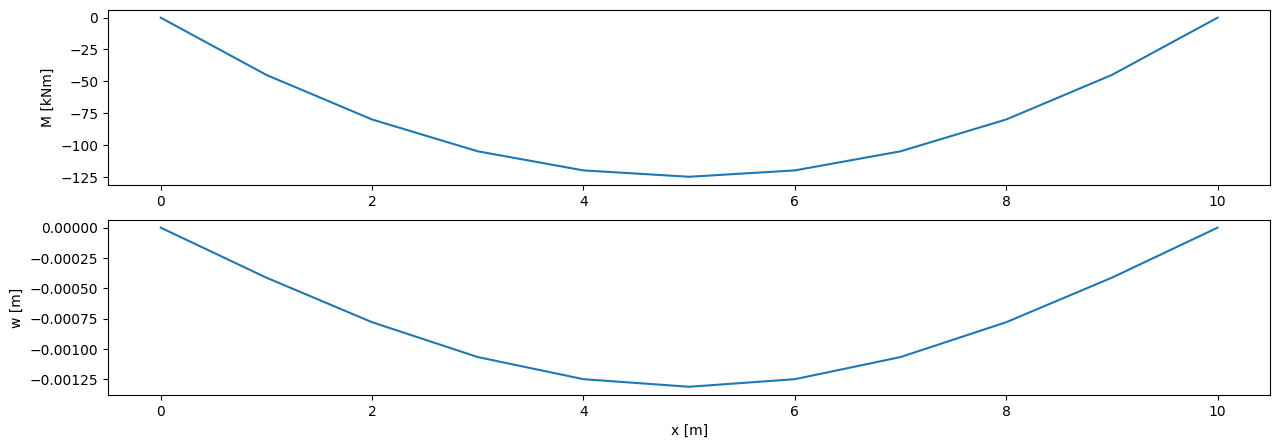

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

ax[0].plot(x, M)
ax[0].set_ylabel("M [kNm]")

ax[1].plot(x, w)
ax[1].set_xlabel("x [m]")
ax[1].set_ylabel("w [m]")

plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.10:}$
    
Which method do you prefer? Solving the equations sequentially or simultaneously?

Does it make a difference for the accuracy of the results? Motivate your answer.

</p>
</div>

> By Ronald Brinkgreve, Anna Störiko, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).